## Movie Data Mining and Analysis

In [2]:
# data analysis
import pandas as pd
import numpy as np
# text processing
import nltk
# machine learning
import sklearn
# social network analysis
import networkx as net
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

# You can import other packages if necessary

## Part 1 - Exploring Movie Data

In this part, I will work with the following dataset:
* movies.csv - This dataset contains a sample of movies including movie info, box office gross revenues, as well as audience and critic ratings. The dataset combines data from multiple sources: Rotten Tomatoes, The Numbers, and IMDB. The variable names started with 'rt' indicate the ones collected from the Rotten Tomatoes. For example, the variable 'rtAllCriticsRating' is average movies ratings from the Rotten Tomatoes critics.

Here is an example movie page on the Rotten Tomatoes: https://www.rottentomatoes.com/m/the_theory_of_everything_2014

In [4]:
# Load the data
movies = pd.read_csv('movies.csv')

In [5]:
movies.head()

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,30000000.0,G,NaN,Walt Disney Pictures,Original Screenplay,Adventure,Kids Fiction,John Lasseter,8.2,151143.0
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,65000000.0,PG,NaN,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Joe Johnston,6.4,54973.0
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,58000000.0,PG,NaN,Paramount Pictures,Remake,Romantic Comedy,Contemporary Fiction,Sydney Pollack,6.0,15749.0
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,60000000.0,PG-13,NaN,MGM,Based on Book/Short Story,Action,Contemporary Fiction,Martin Campbell,7.2,69199.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,62000000.0,PG-13,NaN,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Rob Reiner,6.8,22780.0


In [6]:
movies.columns

Index(['id', 'title', 'imdbID', 'year', 'rtID', 'rtAllCriticsRating',
       'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh',
       'rtAllCriticsNumRotten', 'rtAllCriticsScore', 'rtTopCriticsRating',
       'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'US Gross',
       'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'IMDB Rating', 'IMDB Votes'],
      dtype='object')

In [7]:
movies.dtypes

id                          int64
title                      object
imdbID                      int64
year                        int64
rtID                       object
rtAllCriticsRating         object
rtAllCriticsNumReviews     object
rtAllCriticsNumFresh       object
rtAllCriticsNumRotten      object
rtAllCriticsScore          object
rtTopCriticsRating         object
rtTopCriticsNumReviews     object
rtTopCriticsNumFresh       object
rtTopCriticsNumRotten      object
rtTopCriticsScore          object
rtAudienceRating           object
rtAudienceNumRatings       object
rtAudienceScore            object
US Gross                   object
Worldwide Gross            object
US DVD Sales              float64
Production Budget         float64
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
IMDB Rating   

### 1.1. Box Office Success

One of the overarching question would be: **what factors are associated with the box office success of movies?**

- The dataset has 31 columns and is made up of a set of critics ratings, genre, revenue earned etc. 
- Hypothesis: My hypothesis is that there is a correlation between Genre and Profit OR Production Budget and Profit. 
- The variables I am going to examine are Genre, Production Budget against Profit (calculated using Worldwide Gross-Production Budget).
- Concerns: There could be a other variables such as time of the year, age demographic that contribute to a box office success but they are not available in the dataset. 

In [21]:
movies["Worldwide Gross"] = pd.to_numeric(movies["Worldwide Gross"], errors='coerce')
movies['Major Genre'] = movies['Major Genre'].astype('category')
movies['Distributor'] = movies['Distributor'].astype('category')

In [23]:
# EDA Codes
eda_features = movies[['title','Worldwide Gross', 'Production Budget','Major Genre','Distributor']]
eda_features['World Profit'] = (eda_features['Worldwide Gross'] - eda_features['Production Budget'])

C:\Users\shett\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
eda_features.head()

,title,Worldwide Gross,Production Budget,Major Genre,World Profit
0,Toy story,361948825.0,30000000.0,Adventure,331948825.0
1,Jumanji,262758310.0,65000000.0,Adventure,197758310.0
2,Sabrina,87100000.0,58000000.0,Romantic Comedy,29100000.0
3,GoldenEye,356429941.0,60000000.0,Action,296429941.0
4,The American President,107822813.0,62000000.0,Romantic Comedy,45822813.0


In [10]:
eda_features.columns

Index(['title', 'Worldwide Gross', 'Production Budget', 'Major Genre',
       'World Profit'],
      dtype='object')

In [11]:
# create a new column for color coding categories of data points
color_list = []
for row in eda_features.iterrows():
    if row[1]['World Profit'] > 100000000:
        color_list.append('green')
    elif row[1]['World Profit'] < 0:
        color_list.append('red')
    else:
        color_list.append('orange')
eda_features['point_color'] = color_list

C:\Users\shett\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0.5,1,'Movie trends')

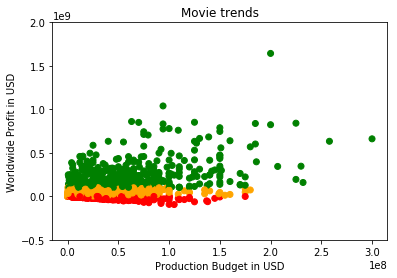

In [19]:
plt.scatter(x=eda_features['Production Budget'], 
            y= eda_features['World Profit'], 
            c=eda_features['point_color'])
plt.ylim([-0.5e9,2e9])
plt.xlabel("Production Budget in USD")
plt.ylabel("Worldwide Profit in USD")
plt.title("Movie trends")

Discussion: The above plot shows that there isnt a strong correlation between production budget and profit. This could be because the performance of a movie could depend on a host of other stronger reasons such as plot of the movie, marketing strategy, time of the year it was released etc.

Text(0.5,1,'Movie trends by genre')

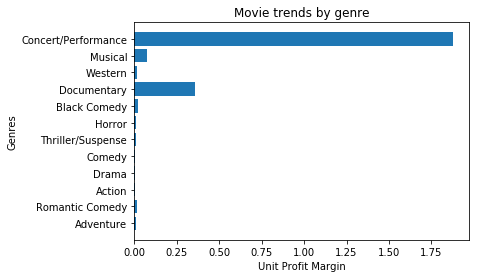

In [35]:
movie_genres = eda_features['Major Genre'].unique().dropna()

total_profit = list()
for genre in movie_genres:
    no_of_film_genre = len(eda_features.loc[eda_features['Major Genre'] == genre])
    total_budget = eda_features.loc[eda_features['Major Genre'] == genre]['Production Budget'].sum()
    unit_genre_profit = (eda_features.loc[eda_features['Major Genre'] == genre]['World Profit'].sum())/no_of_film_genre
    unit_genre_profit_margin = unit_genre_profit/total_budget
    total_profit.append(unit_genre_profit_margin)

plt.barh(movie_genres,total_profit)
plt.xlabel("Unit Profit Margin")
plt.ylabel("Genres")
plt.title("Movie trends by genre")

Discussion: The above plot shows that certain types of genres such as concert or performance related movies generate a better ROI as compared to other genres based on profit margin. This could be that certain kinds of genres, have a very dedicated fanbase such as in the case of performance oriented movies OR they perform well inspite of having a small budget such as documentaries.

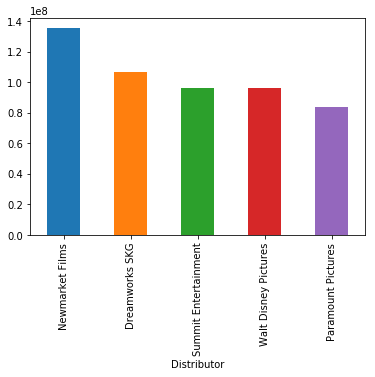

Distributor
Newmarket Films         1.354077e+08
Dreamworks SKG          1.066458e+08
Summit Entertainment    9.606759e+07
Walt Disney Pictures    9.584064e+07
Paramount Pictures      8.362513e+07
Name: World Profit, dtype: float64


In [30]:
movies_data_genre =eda_features.groupby(['Distributor'])['World Profit'].mean()
movies_data_genre

movies_data_genre.sort_values(ascending=False)[:5].plot.bar()

plt.show()
print(movies_data_genre.sort_values(ascending=False)[:5])

Discussion: The above plot shows that certain kinds of distributors achieve better box office success as compared to others. This could be because of a number of reasons such as having a pre-established name, better connections around the world, a better marketing team etc. 

### 1.2. Consistency between movie ratings

Next, I will compare movie ratings given by critics versus audience on the Rotten tomatoes.

* Do users agree with critics in terms of movie ratings on the Rotten Tomatoes? When they do and when they don't?

- The dataset has 31 columns and is made up of a set of critics ratings, genre, revenue earned etc. 
- The variables I am going to examine are rtAllCriticsRating against rtAudienceRating.
- Concerns: There could be a other factors such age demographic that contribute to a box office success but they are not available in the dataset. 

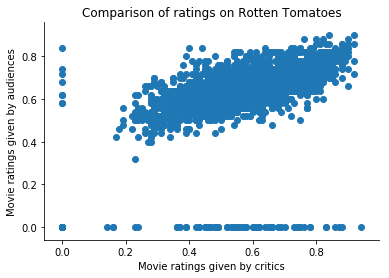

In [37]:
#  EDA

movies["rtAllCriticsRating"] = pd.to_numeric(movies["rtAllCriticsRating"], errors='coerce')/10
movies["rtAudienceRating"] = pd.to_numeric(movies["rtAudienceRating"], errors='coerce')/5

subset = movies[['rtAllCriticsRating', 'rtAudienceRating']]

# plot the data points to visualize so that we can spot any patterns
p = plt.subplot(111)
plt.scatter(x=subset['rtAllCriticsRating'], 
            y=subset['rtAudienceRating'])
plt.xlabel("Movie ratings given by critics")
plt.ylabel("Movie ratings given by audiences")
plt.title("Comparison of ratings on Rotten Tomatoes")
p.spines['right'].set_visible(False)
p.spines['top'].set_visible(False)

Step 3. Discussion: From the above graph I infer that critics rating and audience rating roughly match each other most of the times.

## Part 2 - Analyzing Movie Reviews

Now let's move on to build a Naive Bayes classifier to predict whether a review is Fresh or Rotten, based on the text of the review.

In [7]:
# Import movie reviews data
reviews = pd.read_csv("reviews.csv")

### 2.1 Text Cleaning and Unigram Representation

Before I get into the text classification, let's spend some time work with the reviews text! 
In this part, I will first clean the reviews by:

* Ignoring case
* Ignoring punctuation & extra whitespaces
* Removing stopwords

Then, I will tokenize the reviews; in other words, convert the text fields into "bag of words" vectors.
One thing that will be used is the [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn. This function also provides built-in methods to lower cases, remove punctuations, whitespaces and stopwords. Eventually, we will get a bag-of-words array from the reviews data. I will name the complete feature set as X and the target (i.e. rotten or fresh labels) as Y.

* X is a (nreview, nwords) array. Each row corresponds to a bag-of-words representation for a single review. This will be the input to my model.
* Y is a nreview-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired output from the model.

In [8]:
reviews.head()

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"So ingenious in concept, design and execution ...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,The year's most inventive comedy.,2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,A winning animated feature that has something ...,2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,The film sports a provocative and appealing st...,2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10 00:00:00,9559,Toy Story


In [ ]:
# text cleaning & tokenizing
from nltk.corpus import stopwords
import re

#Review cleaning
reviews.quote = reviews.quote.str.lower()
reviews.quote = reviews.quote.str.strip()
reviews.quote = reviews.quote.str.replace('[^\w\s]', ' ')
reviews.quote = reviews.quote.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words('english')]))
reviews.head()

In [5]:
from nltk.tokenize import word_tokenize
reviews.quote = reviews.quote.apply(word_tokenize)
reviews.head()

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"[So, ingenious, in, concept, ,, design, and, e...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,"[The, year, 's, most, inventive, comedy, .]",2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,"[A, winning, animated, feature, that, has, som...",2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,"[The, film, sports, a, provocative, and, appea...",2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"[An, entertaining, computer-generated, ,, hype...",2008-03-10 00:00:00,9559,Toy Story


In [91]:
X = reviews['quote']
X_data = [" ".join(t) for t in X.values]
print(X_data[:2])

['ingenious concept design execution could watch postage stamp sized screen still engulfed charm', 'year inventive comedy']


In [92]:
Y = reviews['fresh'].apply(lambda x: 1 if x == "fresh" else 0)
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: fresh, dtype: int64

### 2.2 Train-Test Split

Next, randomly split the data into a training set (67%) and a test set (33%) using [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_data)
X_data = vectorizer.transform(X_data)
X_data = X_data.toarray()

# Make a train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=0.33, random_state=42)

In [94]:
X_train

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 2.3 Rotten or Fresh? Reviews Classification using Naive Bayes (5 pts)
Now let's train a Naive Bayes classifier!

In [95]:
from sklearn.naive_bayes import MultinomialNB
# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB()
fitted_model.fit(X_train, Y_train)
print("Test data score:",fitted_model.score(X_test, Y_test))
print("Train data score:",fitted_model.score(X_train, Y_train))

Test data score: 0.7781785392245266
Train data score: 0.9247168554297135


Discussion: The accuracy on the training set is higher than that on the test set. This is as expected because the model is fitted on the training data and will therefore have a higher accuracy on the training set as compared to an unknown set which in this case is the test set.

### 2.4 Adding Text Normalization
Previously, I cleaned the reviews by ignoring cases, removing stopwords, extra whitespaces and punctuations. Now, let's also try to reduce words to their stems. 

I will use the PorterStemmer algorithm to perform word stemming on movie review strings. The NLTK package has an implementation of this algorithm. Then, extract bag-of-words features based on the stemmed data and conduct machine learning experiments again as you did from 2.2 to 2.4. Compare the performance of this NB model with the performance in 2.3.

In [96]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(stems)
    return lemmas

In [97]:
# Your codes here - for incorporating stemming
reviews.quote = reviews.quote.apply(stem_and_lemmatize)
reviews.head()

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"[ingeny, conceiv, design, execut, could, watch...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,"[year, inv, comedy]",2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,"[win, anim, feat, someth, everyon, ag, spectr]",2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,"[film, sport, provoc, ap, story, every, bite, ...",2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"[entertain, comput, gen, hyper, anim, feat, 19...",2008-03-10 00:00:00,9559,Toy Story


In [98]:
X = reviews['quote']
X_data = [" ".join(t) for t in X.values]
print(X_data[:2])

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X_data)
X_data = vectorizer.transform(X_data)
X_data = X_data.toarray()

# Make a train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=0.33, random_state=42)

['ingeny conceiv design execut could watch post stamp siz screen stil engulf charm', 'year inv comedy']


In [99]:
from sklearn.naive_bayes import MultinomialNB
# call the fitted model fitted_model, for future reference:
fitted_model = MultinomialNB()
fitted_model.fit(X_train, Y_train)
print("Test data score:",fitted_model.score(X_test, Y_test))
print("Train data score:",fitted_model.score(X_train, Y_train))

Test data score: 0.763751127141569
Train data score: 0.8865200977126361
